<br>


## <center> INDUSTRIAL COPPER MODELLING

### IMPORTING MODULE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Reading file path using pandas

In [2]:
df=pd.read_excel(r"C:\Users\sridh\Desktop\Guvi Project\Capstone project\Industrial copper 5\Copper_Set.xlsx")

In [3]:
data=df.copy(True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
id,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,E140FF1B-2407-4C02-A0DD-780A093B1158,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,4E1C4E78-152B-430A-8094-ADD889C9D0AD,FE372230-29B1-4A29-BB73-CB9D3078C286,E1B47219-42C8-411D-AE46-AD5256DC4757,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,2851F48B-DA32-4DF3-884B-17A3100DD65A,6E4D638C-A820-4A40-836F-C9D48BC65528,...,08F8F1D6-0DAC-42B5-BA8A-B6C99EF1700B,A33557CD-93EF-4828-8235-E0A576C1A925,F9B79E56-2EBF-417B-9802-7F575D1079F7,C01DE4E8-BC5F-42AD-B35F-8FCBEE34C6ED,0B812591-B501-4F34-859A-B06381FAEB44,DE633116-D1DF-4846-982E-55EFC3658A76,A48374B1-E6DB-45F2-889A-1F9C27C099EB,91643238-5C7B-4237-9A5F-63AE3D35F320,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC
item_date,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,20210401.0,...,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0,20200702.0
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28.0,25.0,30.0,32.0,28.0,25.0,30.0,32.0,38.0,25.0,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
data.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
data.shape

(181673, 14)

In [7]:
data.describe(exclude=object).T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


## CONVERTING DATAFRAME <br>
- NUMERIC
- DATETIME
- CATEGORY

## DATA PREPROCESSING <BR>
- Handling missing values
- Detecting and Treating outliers / skewness
- Normalizing data
- Feature selection

In [8]:
columns_to_convert_numeric = ["quantity tons", "customer", "country", "application", "thickness", "width", "selling_price"]
data[columns_to_convert_numeric] = data[columns_to_convert_numeric].apply(pd.to_numeric, errors="coerce")

In [9]:
columns_to_convert_datetime = ['item_date', 'delivery date']
for i in columns_to_convert_datetime:
    data[i] = pd.to_datetime(data[i], format='%Y%m%d', errors='coerce').dt.date

In [10]:
data.loc[data['material_ref'].str.contains('0{10,}', na=False), 'material_ref'] = np.nan

In [11]:
data.isna().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100610
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [12]:
data=data.drop(['id'],axis=1)

In [13]:
columns_fill_mean = ["quantity tons" , "thickness", "width", "selling_price"]
column_means = data[columns_fill_mean].mean()
data[columns_fill_mean] = data[columns_fill_mean].fillna(column_means)

In [14]:
columns_fill_mode = ['item_date', 'status', 'delivery date', 'customer', 'country', 'item type', 'application', 'material_ref', 'product_ref']
columns_modes = data[columns_fill_mode].mode().iloc[0]
data[columns_fill_mode] = data[columns_fill_mode].fillna(columns_modes)

In [15]:
data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
data['country'] = data['country'].astype(np.int64)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  int64  
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  int64  
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 18.0+ MB


In [18]:
data.shape

(181673, 13)

In [19]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,181663,181664,181665,181666,181667,181668,181669,181670,181671,181672
item_date,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,2021-04-01,...,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02,2020-07-02
quantity tons,54.151139,768.024839,386.127949,202.411065,785.526262,225.790676,3.522613,113.387124,69.071853,630.626917,...,1203.157826,603.11494,6.169226,82.123794,106.783299,102.482422,208.086469,4.235594,-2000.0,406.686538
customer,30156308.0,30202938.0,30153963.0,30349574.0,30211560.0,30202938.0,30209509.0,30342192.0,30341428.0,30202938.0,...,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0,30200854.0
country,28,25,30,32,28,25,30,32,38,25,...,25,25,25,25,25,25,25,25,25,25
status,Won,Won,Won,Won,Won,Won,Draft,Won,Won,Won,...,Won,Won,Won,Won,Won,Won,Won,Won,Won,Won
item type,W,W,WI,S,W,W,W,W,S,W,...,W,W,W,W,W,W,W,W,W,W
application,10.0,41.0,28.0,59.0,10.0,41.0,41.0,41.0,10.0,41.0,...,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
thickness,2.0,0.8,0.38,2.3,4.0,1.5,0.38,0.68,0.6,1.5,...,0.72,0.85,0.71,1.18,0.96,0.96,0.95,0.71,0.85,0.71
width,1500.0,1210.0,952.0,1317.0,2000.0,1265.0,1125.0,1220.0,1275.0,1165.0,...,1240.0,1240.0,1300.0,1220.0,1240.0,1220.0,1500.0,1250.0,1250.0,1240.0
material_ref,DEQ1 S460MC,DX51D+Z,S0380700,DX51D+ZM310MAO 2.3X1317,2_S275JR+AR-CL1,DX51D+Z,NBW_L+_A_1125_0.4,DX51D+Z,DX51D+Z,DX51D+Z,...,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z,DX51D+Z


## EXPLORATORY DATA ANALYSIS 

TO VISUALIZE OUTLIERS AND SKEWNESS

#### BEFORE TREATING OUTLIERS AND  SKEWNESS 

In [20]:
eda_data=data.copy(True)

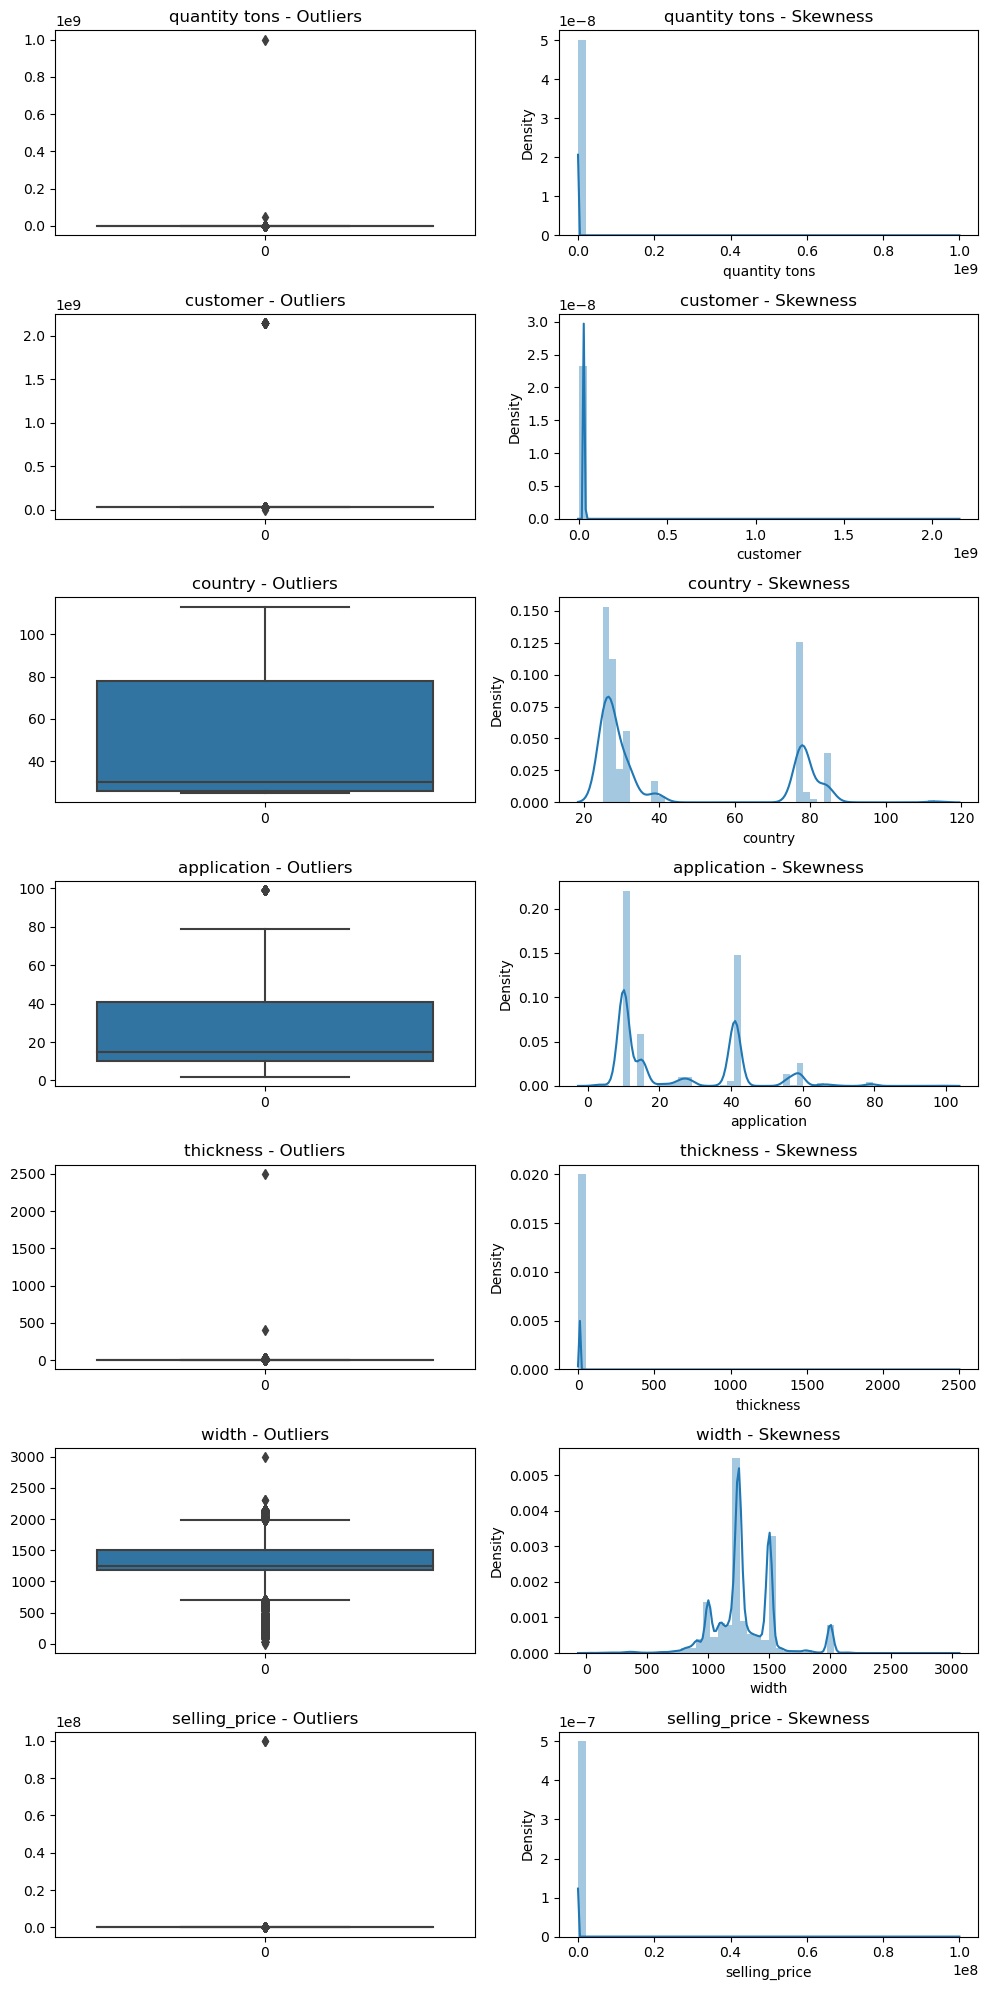

In [21]:
# Create a figure with 6 subplots
fig, axes = plt.subplots(7, 2, figsize=(10,20))
 
sns.boxplot(ax=axes[0, 0], data=eda_data['quantity tons'])      #quantity tons
axes[0, 0].set_title('quantity tons - Outliers')
sns.distplot(ax=axes[0, 1], a=eda_data['quantity tons'])
axes[0, 1].set_title('quantity tons - Skewness')
 
sns.boxplot(ax=axes[1, 0], data=eda_data['customer'])          #customer
axes[1, 0].set_title('customer - Outliers')
sns.distplot(ax=axes[1, 1], a=eda_data['customer'])
axes[1, 1].set_title('customer - Skewness')

sns.boxplot(ax=axes[2, 0], data=eda_data['country'])           #country
axes[2, 0].set_title('country - Outliers')
sns.distplot(ax=axes[2, 1], a=eda_data['country'])
axes[2, 1].set_title('country - Skewness')

sns.boxplot(ax=axes[3, 0], data=eda_data['application'])       #application
axes[3, 0].set_title('application - Outliers')
sns.distplot(ax=axes[3, 1], a=eda_data['application'])
axes[3, 1].set_title('application - Skewness')

sns.boxplot(ax=axes[4, 0], data=eda_data['thickness'])        #thickness
axes[4, 0].set_title('thickness - Outliers')
sns.distplot(ax=axes[4, 1], a=eda_data['thickness'])
axes[4, 1].set_title('thickness - Skewness')

sns.boxplot(ax=axes[5, 0], data=eda_data['width'])            #width
axes[5, 0].set_title('width - Outliers')
sns.distplot(ax=axes[5, 1], a=eda_data['width'])
axes[5, 1].set_title('width - Skewness')

sns.boxplot(ax=axes[6, 0], data=eda_data['selling_price'])   #selling_price
axes[6, 0].set_title('selling_price - Outliers')
sns.distplot(ax=axes[6, 1], a=eda_data['selling_price'])
axes[6, 1].set_title('selling_price - Skewness')

plt.tight_layout()
plt.show()

In [22]:
out_skew_data=eda_data.copy(True)

In [23]:
skewed_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
for column in skewed_columns:
    neg = (out_skew_data[column] <= 0)
    print(f'{column} : {neg.sum()} ')
    out_skew_data.loc[neg,column] = np.nan

quantity tons : 4 
thickness : 0 
width : 0 
selling_price : 7 


In [24]:
out_skew_data.isna().sum()

item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [25]:
out_skew_data.dropna(inplace=True)

In [26]:
out_skew_data.isna().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [27]:
out_skew_data.skew()

quantity tons    424.677959
customer          86.982674
country            0.753023
application        0.724614
thickness         15.291371
width              0.374564
product_ref        1.015276
selling_price    301.378964
dtype: float64

In [28]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']
before_stats = out_skew_data[outlier_columns].describe()

# Iterate over outlier columns and remove outliers
for column in outlier_columns:
    Q1 = out_skew_data[column].quantile(0.30)
    Q3 = out_skew_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    out_skew_data = out_skew_data[(out_skew_data[column] >= lower_bound) & (out_skew_data[column] <= upper_bound)]

# Calculate summary statistics after removing outliers
after_stats = out_skew_data[outlier_columns].describe()

# Compare the statistics before and after outlier removal
print("Summary statistics before removing outliers:")
print(before_stats)
print("\nSummary statistics after removing outliers:")
print(after_stats)


Summary statistics before removing outliers:
       quantity tons      thickness          width  selling_price
count   1.816620e+05  181662.000000  181662.000000   1.816620e+05
mean    5.875291e+03       2.551133    1295.289042   1.918156e+03
std     2.349146e+06       2.977116     261.638547   3.318048e+05
min     1.000000e-05       0.180000       1.000000   1.000000e-01
25%     1.097088e+01       0.700000    1180.000000   6.690000e+02
50%     3.036501e+01       1.500000    1250.000000   8.120000e+02
75%     6.716141e+01       3.000000    1500.000000   9.530000e+02
max     1.000000e+09     400.000000    2990.000000   1.000010e+08

Summary statistics after removing outliers:
       quantity tons      thickness          width  selling_price
count  132631.000000  132631.000000  132631.000000  132631.000000
mean       35.586278       1.803089    1265.155654     841.050729
std        31.885531       1.441616     174.815790     189.197046
min         0.000010       0.180000     855.000000  

#### AFTER TREATING OUTLIERS AND SKEWNESS

<function matplotlib.pyplot.show(close=None, block=None)>

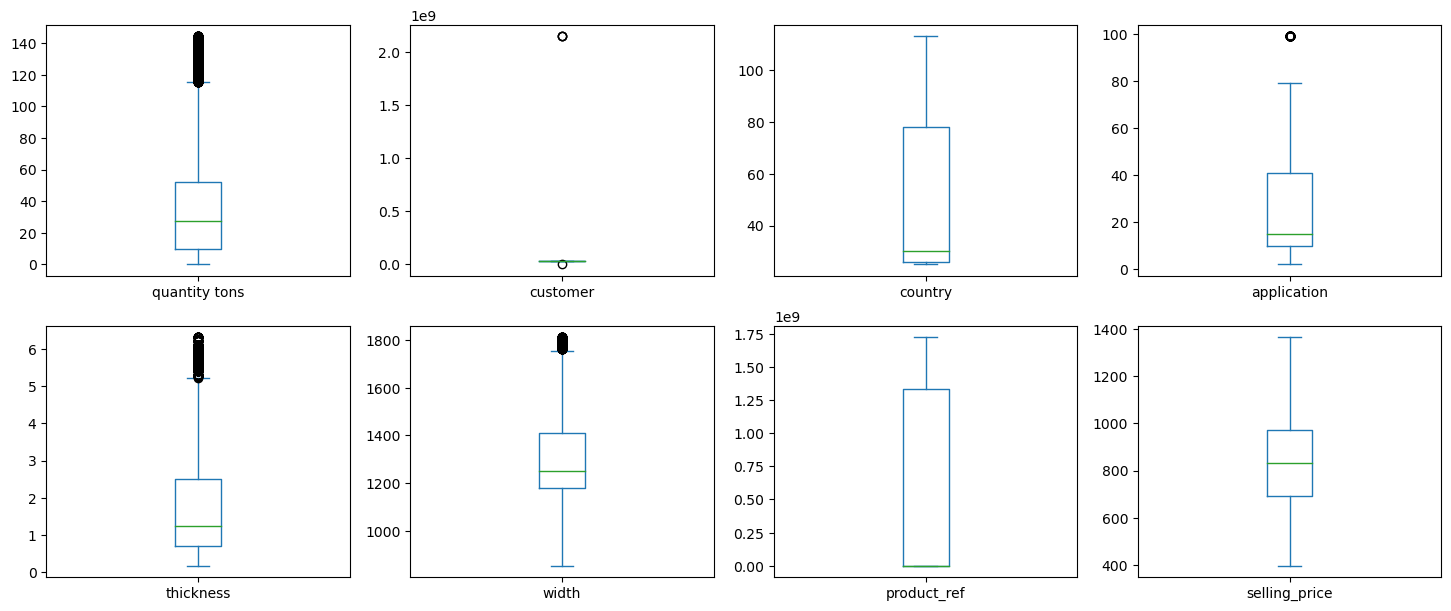

In [29]:
out_skew_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(18,15))
plt.show

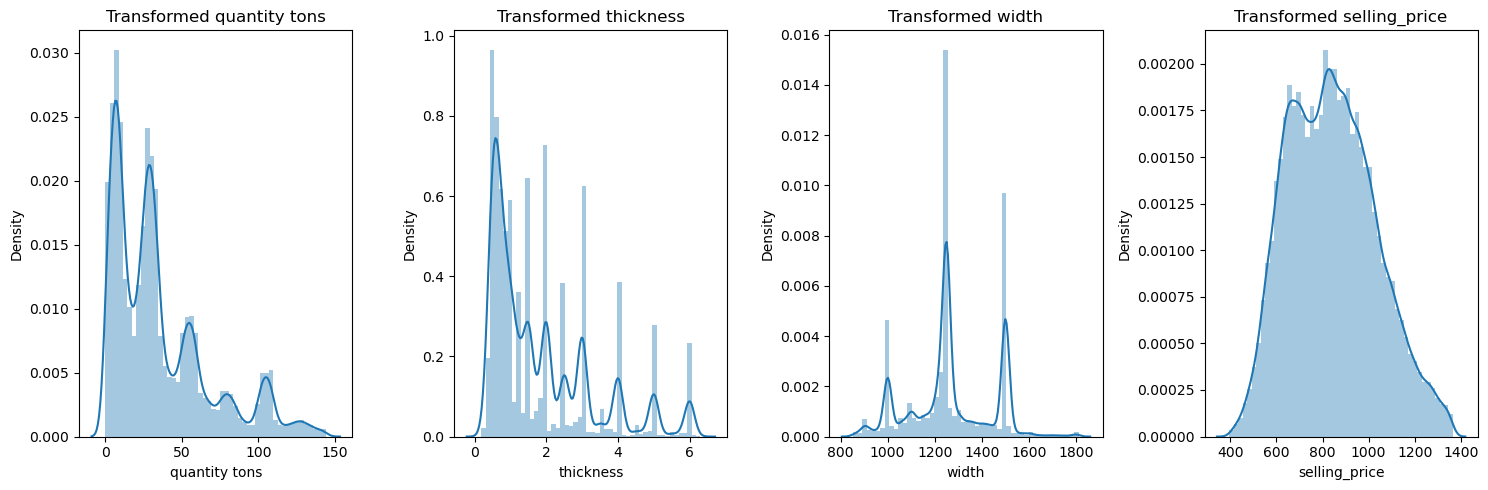

In [30]:
outlier_columns = ['quantity tons', 'thickness', 'width', 'selling_price']

# Plot the histograms of the transformed data
fig, axes = plt.subplots(1, 4,figsize=(15, 5))
axes = axes.flatten()
for i, column in enumerate(outlier_columns):
    sns.distplot(out_skew_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f"Transformed {column}")

plt.tight_layout()
plt.show()

In [31]:
out_skew_data.skew()

quantity tons      1.239223
customer         210.220811
country            0.700979
application        0.684824
thickness          1.276129
width              0.057992
product_ref        0.983758
selling_price      0.310072
dtype: float64

Here are some guidelines for interpreting skewness values:   <br>

Skewness value close to 0: The distribution is approximately symmetrical.<br>
Skewness value between -0.5 and -1 or between 0.5 and 1: The distribution is moderately skewed.<br>
Skewness value less than -1 or greater than 1: The distribution is highly skewed.<br>

### FEATURE ENGINEERING
- Lable encoding
- Feature selection
- Standardize / normalize data

In [32]:
model_data=out_skew_data.copy(True)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132631 entries, 0 to 181670
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      132631 non-null  object 
 1   quantity tons  132631 non-null  float64
 2   customer       132631 non-null  float64
 3   country        132631 non-null  int64  
 4   status         132631 non-null  object 
 5   item type      132631 non-null  object 
 6   application    132631 non-null  float64
 7   thickness      132631 non-null  float64
 8   width          132631 non-null  float64
 9   material_ref   132631 non-null  object 
 10  product_ref    132631 non-null  int64  
 11  delivery date  132631 non-null  object 
 12  selling_price  132631 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 14.2+ MB


In [33]:
model_data['delivery_time_taken']=(model_data['item_date']-model_data['delivery date']).abs().dt.days
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,32,Won,W,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,38,Won,S,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,32,Won,W,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,78,Won,W,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91


In [34]:
x=model_data[['application','thickness','width','selling_price','quantity tons','country','customer','product_ref','delivery_time_taken']].corr()

#### HEATMAP FOR FIND THE CORRELATON BETWEEN THE DATA

<AxesSubplot:>

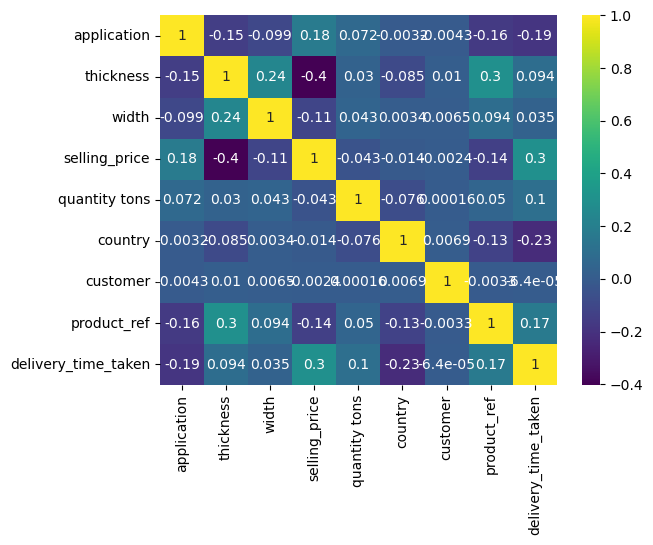

In [35]:
sns.heatmap(x, annot=True, cmap="viridis")

#### FINDING UNIQUE VALUE

In [36]:
model_data['country'] = model_data['country'].astype(str)
country=model_data['country'].unique()
status=model_data['status'].unique()
item=model_data['item type'].unique()
print(country)
print(status)
print(item)


['28' '32' '38' '78' '27' '30' '25' '77' '39' '40' '26' '84' '80' '79'
 '113' '89']
['Won' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful' 'Revised'
 'Offered' 'Offerable']
['W' 'S' 'Others' 'PL' 'WI' 'IPL']


#### ENCODE THE CATEGORICAL COLUMN

In [37]:
encode=LabelEncoder()
encode_country=encode.fit(country)
transformed_country = encode_country.transform(country)

encode=LabelEncoder()
encode_status=encode.fit(status)
transformed_status = encode_status.transform(status)

encode=LabelEncoder()
encode_item=encode.fit(item)
transformed_item = encode_item.transform(item)

print(transformed_country)
print(transformed_status)
print(transformed_item)

[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]
[6 5 0 1 7 4 3 2]
[4 3 1 2 5 0]


In [38]:
for i, j in zip(status, transformed_status):
    print('before encoding :',i,'--- encoded :',j)

before encoding : Won --- encoded : 6
before encoding : To be approved --- encoded : 5
before encoding : Lost --- encoded : 0
before encoding : Not lost for AM --- encoded : 1
before encoding : Wonderful --- encoded : 7
before encoding : Revised --- encoded : 4
before encoding : Offered --- encoded : 3
before encoding : Offerable --- encoded : 2


In [39]:
import pickle

file_path='country.pkl'
file_path2='status.pkl'
file_path3='item type.pkl'

with open(file_path, 'wb') as file:
    pickle.dump(encode_country, file)
with open(file_path2, 'wb') as file:
    pickle.dump(encode_status, file)
with open(file_path3, 'wb') as file:
    pickle.dump(encode_item, file)

print(f'Pickle file created: {file_path}, {file_path2},{file_path3}')

Pickle file created: country.pkl, status.pkl,item type.pkl


In [40]:
with open('status.pkl', 'rb') as file:
    encode_status = pickle.load(file)
    
transformed_status = encode_status.transform(status)
transformed_status

array([6, 5, 0, 1, 7, 4, 3, 2])

## REGRESSION MODEL FOR FINDING SELLING PRICE

In [41]:
category_col=['status', 'item type','country']
encoder= LabelEncoder()
for i in category_col:
    print(i)
    model_data[i] = encoder.fit_transform(model_data[i])
    print(model_data[i].unique())

status
[6 5 0 1 7 4 3 2]
item type
[4 3 1 2 5 0]
country
[ 4  6  7 11  3  5  1 10  8  9  2 14 13 12  0 15]


In [42]:
model_data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,delivery_time_taken
0,2021-04-01,54.151139,30156308.0,4,6,4,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0,91
7,2021-04-01,113.387124,30342192.0,6,6,4,41.0,0.68,1220.0,DX51D+Z,611993,2021-01-01,931.0,90
8,2021-04-01,69.071853,30341428.0,7,6,3,10.0,0.60,1275.0,DX51D+Z,1668701376,2021-07-01,1363.0,91
11,2021-04-01,113.995666,30342192.0,6,6,4,41.0,0.55,1220.0,DX51D+Z,611993,2021-01-01,954.0,90
12,2021-04-01,27.512545,30165529.0,11,6,4,10.0,0.75,1250.0,DX51D+Z,164141591,2021-07-01,1098.0,91


In [43]:
X = model_data[[ 'quantity tons','thickness','width','country','status','item type', 'application','product_ref','delivery_time_taken']].values
y = model_data[['selling_price']].values

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
file_path6='scaling.pkl'
with open(file_path6, 'wb') as file:
    pickle.dump(scaler, file)
print(f'Pickle file created: {file_path6}')

Pickle file created: scaling.pkl


In [45]:
# Create an instance of each regression model
et_model = ExtraTreesRegressor()
xgb_model = XGBRegressor()
dt_model = DecisionTreeRegressor()

# Train the models
et_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
et_preds = et_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

# Evaluate the models

et_mse = mean_squared_error(y_test, et_preds)
et_mae = mean_absolute_error(y_test, et_preds)
et_r2 = r2_score(y_test, et_preds)

xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

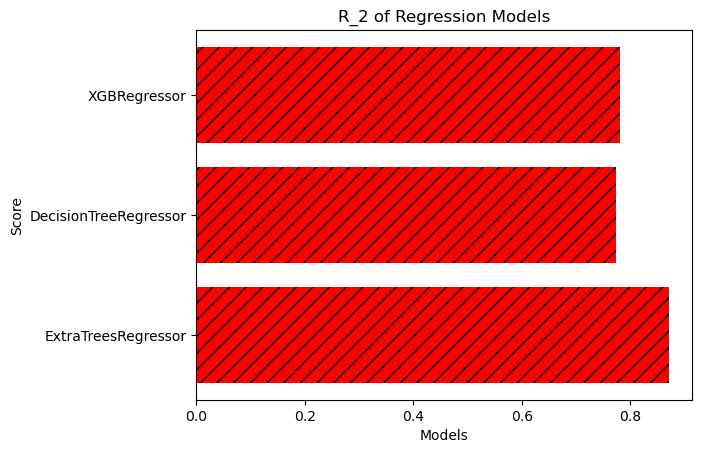

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

ExtraTreesRegressor 0.8710370466652599
DecisionTreeRegressor 0.7728700351386455
XGBRegressor 0.7816785387753782

Model: ExtraTreesRegressor contain Maximum R2_Score: 0.8710370466652599 


In [46]:
models = ['ExtraTreesRegressor', 'DecisionTreeRegressor', 'XGBRegressor']
score = [et_r2, dt_r2, xgb_r2]

plt.barh(models, score, color='red',hatch='//')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('R_2 of Regression Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

In [47]:
model=et_model.fit(X_train, y_train)

In [48]:
file_path7='Extratreeregressor.pkl'
with open(file_path7, 'wb') as file:
    pickle.dump(model, file)
print(f'Pickle file created: {file_path7}')

Pickle file created: Extratreeregressor.pkl


In [57]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_st = input("Enter a status: ")
s = None
for i, j in zip(status, transformed_status):
    if new_sample_st == i:
        s = j
        break
else:
    print("Status not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()


x = [quantity,thickness,width,c, s, it, 41.0,611993, 28]
x = np.array(x).reshape(1, -1)  # Reshape to 2D array
new_sample_scaled = scaler.transform(x)
new_pred = et_model.predict(new_sample_scaled)
print('Predicted selling price:',new_pred )

Enter quantity :6987532
Enter thickness :0.65
Enter width :1500.36
Enter a country: 28
Enter a status: Won
Enter an item type: W
Predicted selling price: [835.7388]


## CLASSIFICATION MODEL FOR PREDICT THE STATUS WON/LOST

In [50]:
X = model_data[[ 'quantity tons','thickness','width','selling_price','country','item type','application','product_ref','delivery_time_taken']].values
y = model_data[['status']].values

scaler_classify = StandardScaler().fit(X)
X = scaler_classify.transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [51]:
file_path8='scaling_classify.pkl'
with open(file_path8, 'wb') as file:
    pickle.dump(scaler_classify, file)
print(f'Pickle file created: {file_path8}')

Pickle file created: scaling_classify.pkl


In [52]:
# Create an instance of each regression model
rf_model = RandomForestClassifier()
xgb_cls_model = xgb.XGBClassifier()
svm_model = SVC()

# Train the models
rf_model.fit(X_train, y_train)
xgb_cls_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
rf_preds = rf_model.predict(X_test)
xgb_cls_preds = xgb_cls_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_preds)
xgb_cls_accuracy = accuracy_score(y_test, xgb_cls_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

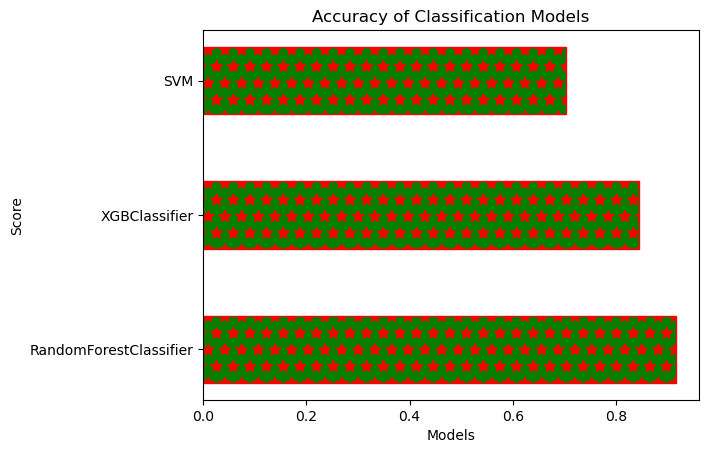

FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY

RandomForestClassifier 0.914878110077909
XGBClassifier 0.8434531289268661
SVM 0.7034430761497864

Model: RandomForestClassifier contain Maximum accuracy: 0.914878110077909 


In [53]:
models = ['RandomForestClassifier', 'XGBClassifier', 'SVM']
score = [rf_accuracy, xgb_cls_accuracy, svm_accuracy]

plt.barh(models, score, color='green',height=0.5,hatch='*',edgecolor='red')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy of Classification Models')
plt.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON  ACCURACY\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum accuracy: {max_score} ")

In [54]:
model_cls=rf_model.fit(X_train, y_train)

In [55]:
file_path9='randomforest_classification.pkl'
with open(file_path9, 'wb') as file:
    pickle.dump(model_cls, file)
print(f'Pickle file created: {file_path9}')

Pickle file created: randomforest_classification.pkl


In [58]:
quantity=input('Enter quantity :')
thickness=input('Enter thickness :')
width=input('Enter width :')
selling_price=input('Enter selling price :')

new_sample_co = input("Enter a country: ")
c = None
for i, j in zip(country, transformed_country):
    if new_sample_co == i:
        c = j
        break
else:
    print("Country not found.")
    exit()

new_sample_it = input("Enter an item type: ")
it = None
for i, j in zip(item, transformed_item):
    if new_sample_it == i:
        it = j
        break
else:
    print("Item type not found.")
    exit()

x = [quantity,thickness,width,selling_price,c,it, 10.0,1670798778, 91]
x = np.array(x).reshape(1, -1)  # Reshape to 2D array
new_sample_scaled = scaler_classify.transform(x)
new_pred = rf_model.predict(new_sample_scaled)

if new_pred==6:
    print('WON' )
else:
    print('LOST')

Enter quantity :7589654
Enter thickness :0.98
Enter width :1200.37
Enter selling price :632548
Enter a country: 28
Enter an item type: W
WON
